In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API URLs for train and cars
url_train = "https://tools.ce.nl/stream/api/data?advanced=false&last_emission_calculation_method=3&year=2&vehicle_category=91&vehicle_technology=2&distance_type=1&emission_calculation_method=3&emission=energy_consumption&emission=co2_eq_incl_infra"
url_cars = "https://tools.ce.nl/stream/api/data?advanced=false&last_emission_calculation_method=3&year=2&vehicle_category=1&vehicle_technology=7&vehicle_technology=35&vehicle_technology=50&distance_type=1&emission_calculation_method=3&emission=co2_eq_incl_infra"

# Fetching data from the CE STREAM API for the train
response_train = requests.get(url_train)
if response_train.status_code == 200:
    data_train = response_train.json()
    co2_train = float(data_train["items"][0]["co2_eq_incl_infra"].replace(",", "."))
    print("Train data has been successfully fetched")
else:
    print("Error fetching train data:", response_train.status_code)

# Fetching data from the CE STREAM API for cars
response_cars = requests.get(url_cars)
if response_cars.status_code == 200:
    data_cars = response_cars.json()
    co2_car_gasoline = float(data_cars["items"][0]["co2_eq_incl_infra"].replace(",", "."))
    co2_car_diesel = float(data_cars["items"][1]["co2_eq_incl_infra"].replace(",", "."))
    co2_car_electric = float(data_cars["items"][2]["co2_eq_incl_infra"].replace(",", "."))
    print("Car data has been successfully fetched")
else:
    print("Error fetching car data:", response_cars.status_code)

Train data has been successfully fetched
Car data has been successfully fetched


In [10]:
# Store CO₂ emissions in a dictionary to later convert into a DataFrame
data = {
    "Vehicle Type": [
        "Train", 
        "Car (Gasoline)", 
        "Car (Diesel)", 
        "Car (Electric)"
    ],
    "CO2 Emissions in grams/km": [
        co2_train, 
        co2_car_gasoline, 
        co2_car_diesel, 
        co2_car_electric
    ]
}

# Create DataFrame
df = pd.DataFrame(data)
df = df.sort_values(by="CO2 Emissions in grams/km", ascending=False)
print(df)

     Vehicle Type  CO2 Emissions in grams/km
2    Car (Diesel)                      165.5
1  Car (Gasoline)                      153.4
3  Car (Electric)                       65.0
0           Train                       23.4


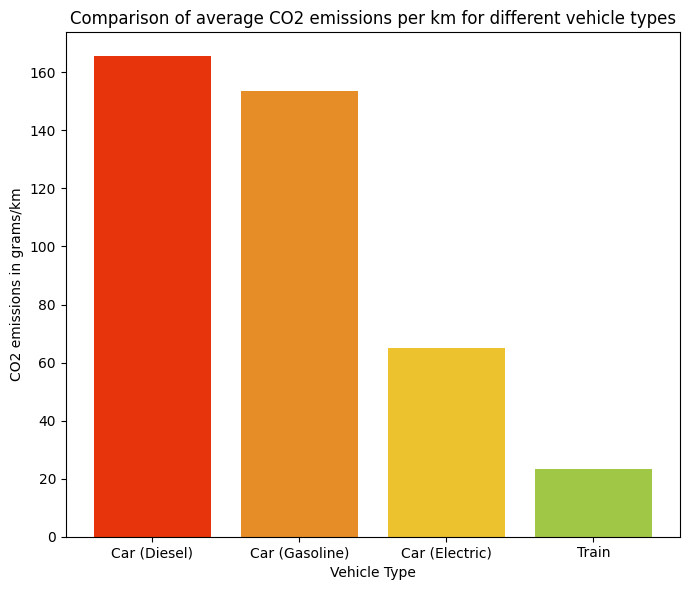

In [12]:
# Create a bar chart for the data
plt.figure(figsize=(7, 6))
plt.bar(df["Vehicle Type"], df["CO2 Emissions in grams/km"], color = ['#E8340C', '#E68D28', '#ECC22F', '#A0C746'])
plt.xlabel("Vehicle Type")
plt.ylabel("CO2 emissions in grams/km")
plt.title("Comparison of average CO2 emissions per km for different vehicle types")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()